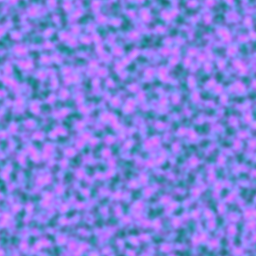

In [11]:
import { createCanvas } from "https://deno.land/x/skia_canvas@0.5.4/mod.ts";
import { createNoise3D } from "https://cdn.skypack.dev/simplex-noise@4.0.0";
import { display } from "https://deno.land/x/display@v1.0.0/mod.ts";
const sleep = (t) => new Promise((r) => setTimeout(r, t));

const noise3D = createNoise3D();
const canvas = createCanvas(256, 256);
const ctx = canvas.getContext("2d");
const imageData = ctx.getImageData(0, 0, canvas.width, canvas.height);
const data = imageData.data;

let options = { display_id: crypto.randomUUID() };

await display(canvas, options);

for (let t = 0; t < 100; t++) {
  await sleep(60);
  for (let x = 0; x < 256; x++) {
    for (let y = 0; y < 256; y++) {
      const r = noise3D(x / 16, y / 16, t / 32) * 0.4 + 0.5;
      const g = noise3D(x / 8, y / 8, t / 32) * 0.1 + 0.5;
      const b = (r + g) * 0.9;

      data[(x + y * 256) * 4 + 0] = r * 255;
      data[(x + y * 256) * 4 + 1] = g * 255;
      data[(x + y * 256) * 4 + 2] = b * 255; // Updated blue channel
      data[(x + y * 256) * 4 + 3] = 255;
    }
  }
  ctx.putImageData(imageData, 0, 0);
  await display(canvas, { ...options, update: true });
}

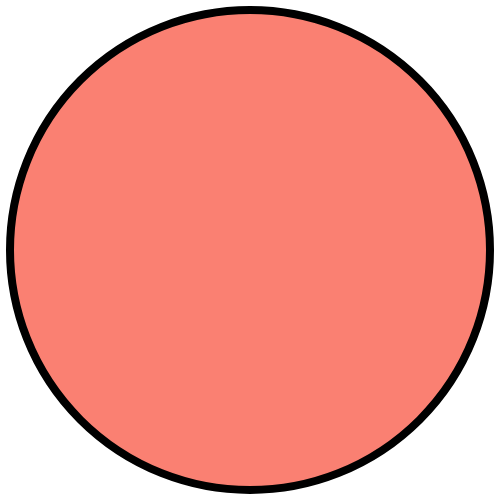

In [14]:
const canvas = createCanvas(500, 500);
const ctx = canvas.getContext("2d");

ctx.translate(250,250)

ctx.strokeStyle = 'black';
ctx.lineWidth = 8;

    ctx.beginPath();
    ctx.arc(0, 0, 240, 0, 2 * Math.PI);
    ctx.fillStyle = 'salmon';
    ctx.fill();
    ctx.stroke();


await display(canvas);

In [ ]:
import { display } from "https://deno.land/x/display@v0.1.1/mod.ts";
display({
  "text/markdown":
    "Get ready for **denotebooks**! ![](https://github.com/denoland.png?size=32)",
});